<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp24_private/blob/main/Resources/Statistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistics (Binary Classification)

Before reading this, please review PythonRefreshers_1 and PythonRefreshers_2 <br>
and Reading_Documentation.

In [41]:
!pip install matplotlib==3.6

# ❗❗ IMPORTANT ❗❗
##  After running the above cell, go to "Runtime" in Colab and click <br> "Restart runtime." You will run into errors later in the notebook <br> if you don't do this.

### After restarting the runtime, we're ready to get into the notebook

Let's consider some metrics for analyzing classifier models. Let's start by<br>
generating some fake **binary classification data**. That is to say, we have **data**<br>
**which is labeled as either a 0 or 1**. We'll simulate what real predictions <br>
look like by "mislabeling" the true data by occasionally swapping 0s and 1s in <br>
our "predictions".

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
label_binary = np.zeros(10000) # Create a list of 0's
pred_binary = np.copy(label_binary) # Copy that list
for i in range(len(label_binary)):
    label_binary[i] += i % 2 # Adding 1 to every other term in the data set
for i in range(len(pred_binary)):
    pred_binary[i] += (i % 2)
    if i % 21 == 0: # Adding some false positives and false negatives
        pred_binary[i] -= (i % 2)
    if i % 54 == 0:
        pred_binary[i] += 1

print(label_binary)
print(pred_binary)

[0. 1. 0. ... 1. 0. 1.]
[1. 1. 0. ... 1. 0. 1.]


Let's consider this data to represent 1=positive and 0=negative data labels. If<br>
our label is 1 and our prediction is 1 then we've correctly identified a **true**<br>
**positive** label. If our prediction is 0 and we label it a 1, we have a **false<br>
positive**.<br>
Likewise:<br>
Label 1, prediction 0: **false negative**<br>
Label 0, prediction 0: **true negative**<br>

The simplest metric you might construct is how often you are correct. Compare<br>
the total number of predictions where your prediction matches the label and<br>
divide by the total number of labels/predictions.

In [44]:
print('Percentage correct prediction: ',
      len(pred_binary[pred_binary == label_binary])/len(pred_binary))

Percentage correct prediction:  0.9576


A more sophisticated way to analyze binary data is to analyze a **confusion**<br>
**matrix**. This lets you know not only when your predictions are wrong or right,<br>
but what aspect of prediction your model struggles with. For this, we'll import<br>
a confusion matrix tool from **sci-kit learn**.

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix makes an *n x n* grid where *n* is the number of unique labels in <br>
`y_true` and your values in the *n x n* grid are the raw counts of times where your <br>
predicted values match your true values. Using `normalize='true'` converts this <br>
to a percentage value in decimal form. From top left to bottom right, these are <br>
True Negative, False Positive, False Negative, and True Positive.

In [46]:
conf_matrix = confusion_matrix(y_true=label_binary, y_pred=pred_binary,
                               labels=[0,1], normalize='all')
print(conf_matrix)

[[0.4814 0.0186]
 [0.0238 0.4762]]


<ipython-input-47-03b4246a7fe1>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + axis_labels, fontsize=14)
<ipython-input-47-03b4246a7fe1>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + axis_labels, fontsize=14)


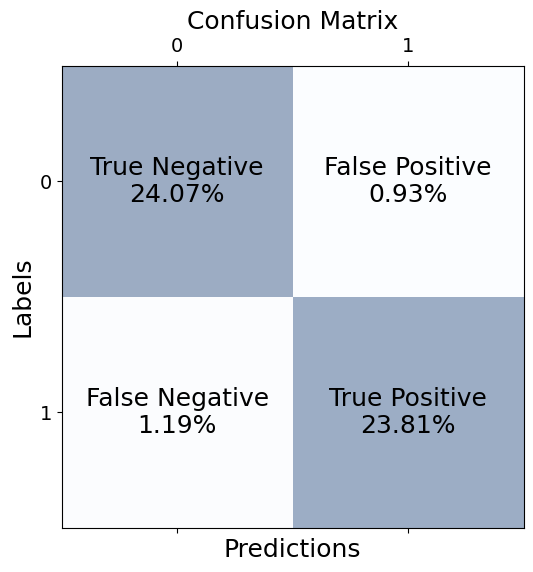

In [47]:
# We can optionally add our own matrix square labels
matrix_labels = [['True Negative', 'False Positive'], ['False Negative',
                                                       'True Positive']]
fig, ax = plt.subplots(figsize=(6, 6)) # figure, axis formatting
# matshow is a special plot type for matrices.
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        # %s = add a string placeholder
        # \n = add a line break
        # %.2f = add a 2 decimal place floating point value placeholder
        # %% = add a percentage sign
        # everything after the free % will be inserted into the placeholders
        ax.text(x=j, y=i, s="%s\n%.2f%%"  % (matrix_labels[i][j],
                                             (conf_matrix[i,j] * 100 /
                                              conf_matrix.shape[1])),
                va='center', ha='center', size=18)

ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Labels', fontsize=18)
# We can optionally add our own axis labels. Defaults to label values.
axis_labels = [str(val) for val in range(2)]
# Formatting trick for adding custom labels.
ax.set_xticklabels([''] + axis_labels, fontsize=14)
ax.set_yticklabels([''] + axis_labels, fontsize=14)
ax.set_title('Confusion Matrix', fontsize=18) # Add a title.
plt.show() # Show plot

### Activity
**Try to create a confusion matrix for a data set with 3 unique labels: <br>
0, 1, 2.**

In [48]:
# First, create data which contains the labels 0, 1, and 2.

label_ternary = np.zeros(10000) # Create a list of 0's
pred_ternary = np.copy(label_ternary) # Copy that list
for i in range(len(label_ternary)):
    label_ternary[i] += i % 3 # Turn list into alternating 0,1,2
for i in range(len(pred_ternary)):
    pred_ternary[i] += (i % 3)
    if i % 21 == 2:
        pred_ternary[i] -= 2
    if i % 42 == 2:
        pred_ternary[i] +=1
    if i % 27 == 1:
        pred_ternary[i] -= 1
    if i % 33 == 1:
        pred_ternary[i] += 1
    if i % 39 == 0:
        pred_ternary[i] += 1
    if i % 48 == 0:
        pred_ternary[i] += 1

print(pred_ternary[0:20]) # Visualize first 20 samples of prediction array

[2. 1. 1. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1.]


❗❗ Modify the lines of code below which have comments next to them ❗❗

In [ ]:
conf_matrix = confusion_matrix(y_true=????, y_pred=????, normalize='all') # What do we need to give the confusion matrix function?

fig, ax = plt.subplots(figsize=(6, 6))

ax.matshow(??????, cmap=plt.cm.Blues, alpha=.4) # What should the first argument in ax.matshow() be?

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s="%.2f%%"  % (conf_matrix[i,j] * 100 /
                                         conf_matrix.shape[1]),
               va='center', ha='center', size=18)

ax.set_xlabel('?????', fontsize=18) # What should the X axis label be?
ax.set_ylabel('?????', fontsize=18) # What should the Y axis label be?

axis_labels = [str(val) for val in range(3)]
ax.set_xticklabels([''] + axis_labels, fontsize=14)
ax.set_yticklabels([''] + axis_labels, fontsize=14)
ax.set_title('Confusion Matrix', fontsize=18)
plt.show()

<ipython-input-49-170b84c94998>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + axis_labels, fontsize=14)
<ipython-input-49-170b84c94998>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + axis_labels, fontsize=14)


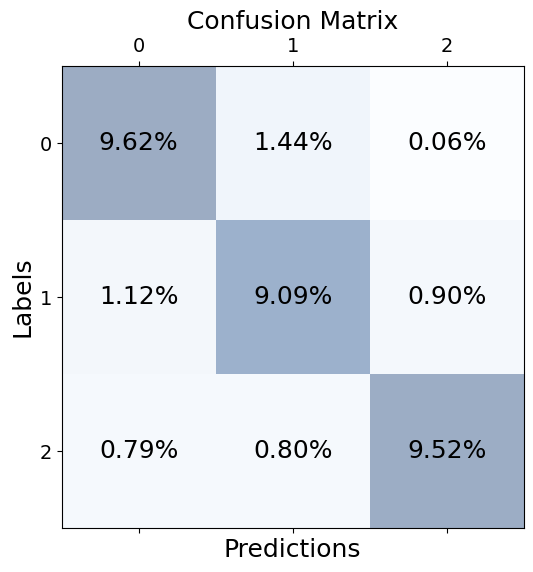

In [49]:
#@title Solution (try on your own first)

conf_matrix = confusion_matrix(y_true=label_ternary, y_pred=pred_ternary, normalize='all')

fig, ax = plt.subplots(figsize=(6, 6))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s="%.2f%%"  % (conf_matrix[i,j] * 100 /
                                         conf_matrix.shape[1]),
                va='center', ha='center', size=18)

ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Labels', fontsize=18)

axis_labels = [str(val) for val in range(3)]
ax.set_xticklabels([''] + axis_labels, fontsize=14)
ax.set_yticklabels([''] + axis_labels, fontsize=14)
ax.set_title('Confusion Matrix', fontsize=18)
plt.show()

A useful metric for binary classification with continuous values (i.e. not <br> exactly 0 or exactly 1) is the Receiver Operating Characteristic, or ROC curve, <br>
along with the area underneath that curve. <br>

Going back to our original dataset, imagine that if instead of exact labels,<br>
our model gave inexact predictions (usually the case in machine learning). <br> We'll use the ROC and AUC tools from the sci-kit  learn metrics library.

In [50]:
from sklearn.metrics import roc_curve, auc

label_binary = np.zeros(10000) # Create a list of 0's
pred_binary = np.zeros(10000) # Copy that list
for i in range(len(label_binary)):
    label_binary[i] += i % 2 # Add 1 to every other term
for i in range(len(pred_binary)):
    pred_binary[i] += (i % 2)
    if i % 21 == 0: # Adding some false positives and false negatives.
        pred_binary[i] -= (i % 2)
    if i % 54 == 0:
        pred_binary[i] += 1
#Adding some "additive gaussian white noise"
pred_binary[pred_binary == 1] -= np.random.normal(loc=.25, scale=.15,
  size=len(pred_binary[pred_binary == 1]))
pred_binary[pred_binary == 0] += np.random.normal(loc=.25, scale=.15,
  size=len(pred_binary[pred_binary == 0]))

print('Labels :', label_binary)
print('Predictions :', pred_binary)

false_positive_rate, true_positive_rate, _ = roc_curve(label_binary, pred_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)

Labels : [0. 1. 0. ... 1. 0. 1.]
Predictions : [0.75390219 0.6838075  0.03699735 ... 0.66697928 0.43462654 0.8429316 ]


**Note: it's still possible to estimate our total number of correct predictions** <br>
**by rounding to the nearest label**. You may notice that your total correct <br> predictions are often similar to the area under the ROC curve but this is not <br>
necessarily always the case. You would need only to change the scale of the random <br>
normal distributions to see these two values grow further apart or closer <br> together.

In [51]:
rounded_pred = np.copy(pred_binary)
rounded_pred[rounded_pred > .5] = 1
rounded_pred[rounded_pred <= .5] = 0
print('Percentage correct prediction: ',
      len(rounded_pred[rounded_pred == label_binary])/len(rounded_pred))
print('Area under the ROC curve: ', roc_auc)

Percentage correct prediction:  0.9126
Area under the ROC curve:  0.9500993600000001


Here we plot the ROC curve by plotting the calculated true positive rates <br>
against the calculated false positive rates. We can use this plot to determine <br>
what a good choice of threshold is. **Depending on the problem**, it might be <br>
more important to avoid False Positives, so you could choose a **decision threshold** <br>
at some point along the curve that achieves that. Often this point is near the <br>
**elbow of the curve** as shown below.

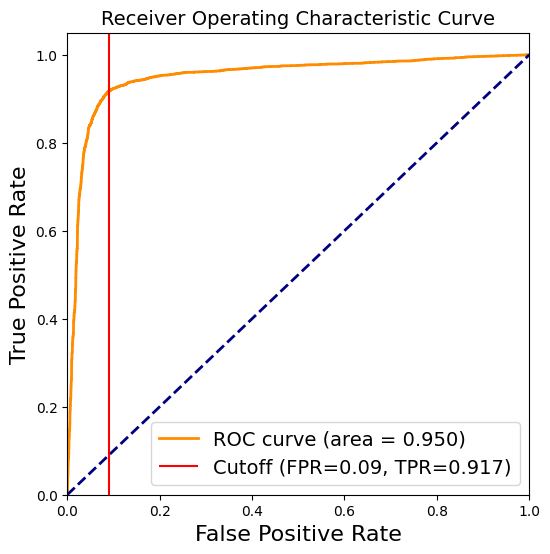

In [53]:
plt.title("Receiver Operating Characteristic Curve", fontsize=14) # Add title
# Line plot of TPR vs FPR. Line width = 2. Standard ROC curve color scheme.
plt.plot(false_positive_rate, true_positive_rate, color="darkorange", lw=2,
         label="ROC curve (area = %0.3f)" % roc_auc)
# Diagonal 1-1 line representing random chance.
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0]) # Set x limit from 0 to 1 for range ROC curve plot
plt.ylim([0.0, 1.05]) # Set ylimit slightly above 1 for visibility of top of ROC curve

# Finding TPR at FPR=0.09 using interpolation
cutoff = 0.09
tpr_at_cutoff = np.interp(cutoff, false_positive_rate, true_positive_rate)
plt.vlines(cutoff, 0, 1.05, color='red', label=f'Cutoff (FPR=0.09, TPR={tpr_at_cutoff})')
plt.gca().figure.set_size_inches(6,6) # Setting a larger figure size. plt.gca() allows changing fig,ax
plt.gca().set_box_aspect(1) # Making plot square
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

Notice how we have fairly smooth behavior of the curve. That's an indicator <br>
that your predictions have some sort of a gaussian error. **If you ever notice** <br>
**sharp angles in a ROC curve**, you should probably **start looking for systematic** <br>
**biases and errors**.